# Descriptives (using the csv file)

In [1]:
import json
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#get the csv

In [3]:
df_clean_data = pd.read_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\clean_data_2021-08-14.csv')

In [4]:
df_clean_data

,@iot.id,phenomenonDate,result,id,lat,long,weekday
0,217458399,2021-08-12,1090,15808,53.650597,9.949614,Thursday
1,216650904,2021-08-11,1040,15808,53.650597,9.949614,Wednesday
2,219332283,2021-08-13,1013,15808,53.650597,9.949614,Friday
3,51222146,2021-01-22,7831,14812,53.628402,10.140319,Friday
4,51496408,2021-01-23,5187,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
120804,207523877,2021-07-31,4156,14412,53.530336,10.065717,Saturday
120805,208617775,2021-08-01,2851,14412,53.530336,10.065717,Sunday
120806,210239080,2021-08-02,4901,14412,53.530336,10.065717,Monday
120807,211949905,2021-08-03,4572,14412,53.530336,10.065717,Tuesday


In [5]:
df_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120809 entries, 0 to 120808
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   @iot.id         120809 non-null  int64  
 1   phenomenonDate  120809 non-null  object 
 2   result          120809 non-null  int64  
 3   id              120809 non-null  int64  
 4   lat             120809 non-null  float64
 5   long            120809 non-null  float64
 6   weekday         120809 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.5+ MB


In [6]:
df_clean_data.dtypes

@iot.id             int64
phenomenonDate     object
result              int64
id                  int64
lat               float64
long              float64
weekday            object
dtype: object

In [7]:
#  I would like to change phenomenonDate back to the format datetime64 (this got lost when saving the file as csv)

In [8]:
df_clean_data=df_clean_data.astype({'phenomenonDate': 'datetime64'})

In [9]:
df_clean_data.dtypes

@iot.id                    int64
phenomenonDate    datetime64[ns]
result                     int64
id                         int64
lat                      float64
long                     float64
weekday                   object
dtype: object

In [10]:
#min/max values

df_clean_data.max()

@iot.id                     219332820
phenomenonDate    2021-08-13 00:00:00
result                         103236
id                              15892
lat                           53.6808
long                          10.2165
weekday                     Wednesday
dtype: object

In [11]:
df_clean_data.min()

@iot.id                      51216915
phenomenonDate    2020-11-01 00:00:00
result                              0
id                              12904
lat                           53.4196
long                          9.73555
weekday                        Friday
dtype: object

In [12]:
df_clean_data.loc[df_clean_data["result"]==0]

,@iot.id,phenomenonDate,result,id,lat,long,weekday
35505,57532591,2021-02-21,0,14648,53.583577,9.984033,Sunday
35511,58820174,2021-02-27,0,14648,53.583577,9.984033,Saturday
35513,59230729,2021-03-01,0,14648,53.583577,9.984033,Monday
51192,51839773,2020-12-01,0,14836,53.598878,9.991415,Tuesday
51194,51840064,2020-11-01,0,14836,53.598878,9.991415,Sunday
...,...,...,...,...,...,...,...
117625,67002239,2021-04-05,0,14856,53.557454,10.033140,Monday
117626,65377816,2021-03-28,0,14856,53.557454,10.033140,Sunday
117631,68002083,2021-04-09,0,14856,53.557454,10.033140,Friday
117632,68123034,2021-04-10,0,14856,53.557454,10.033140,Saturday


In [13]:
#drop all observations which have 0 as result
df_clean_data=df_clean_data[df_clean_data.result!=0]

In [14]:
### --> range of dates: From 2020-11-01 to 2021-08-13 the vehicles are counted

In [15]:
# How many Zählstellen are measuring every day? 

## pivot: count numbers of Zählstellen("id") per phenomenondate
CountZaehlstelle = df_clean_data.pivot_table(values = "id", index = "phenomenonDate", aggfunc= "count")
CountZaehlstelle

,id
phenomenonDate,
2020-11-01,413
2020-11-02,413
2020-11-03,414
2020-11-04,414
2020-11-05,420
...,...
2021-08-09,370
2021-08-10,382
2021-08-11,411


<AxesSubplot:xlabel='phenomenonDate', ylabel='id'>

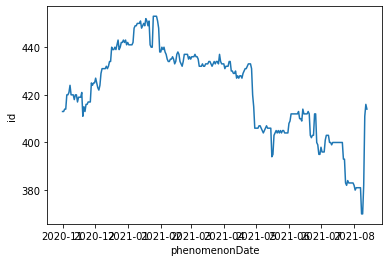

In [16]:
sns.lineplot(data=CountZaehlstelle, x = "phenomenonDate", y = "id")

In [17]:
# Combined number of cars measured each individual day
SumCars = df_clean_data.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumCars

,result
phenomenonDate,
2020-11-01,3103401
2020-11-02,5224876
2020-11-03,5351141
2020-11-04,5298766
2020-11-05,5332135
...,...
2021-08-09,5162366
2021-08-10,5337259
2021-08-11,6138216


In [18]:
#Cars in Summer (summer holidays 24.6.-4.8.--> Look at July) vs. winter (December until 4th Jan (end of holidays))
# create new dataset with only those months

#Summer
start_date = '2021-07-01'
end_date = '2021-07-30'

mask = (df_clean_data['phenomenonDate'] > start_date) & (df_clean_data['phenomenonDate'] <= end_date)

df_clean_data_summer = df_clean_data.loc[mask]

df_clean_data_summer

,@iot.id,phenomenonDate,result,id,lat,long,weekday
255,164293050,2021-07-02,7891,14812,53.628402,10.140319,Friday
256,165919656,2021-07-03,5748,14812,53.628402,10.140319,Saturday
257,167354287,2021-07-04,4427,14812,53.628402,10.140319,Sunday
258,168996471,2021-07-05,7463,14812,53.628402,10.140319,Monday
259,170415667,2021-07-06,7443,14812,53.628402,10.140319,Tuesday
...,...,...,...,...,...,...,...
120799,200163128,2021-07-26,5603,14412,53.530336,10.065717,Monday
120800,201599678,2021-07-27,5896,14412,53.530336,10.065717,Tuesday
120801,203232443,2021-07-28,5530,14412,53.530336,10.065717,Wednesday
120802,204917074,2021-07-29,5978,14412,53.530336,10.065717,Thursday


In [19]:
SumCars_summer = df_clean_data_summer.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumCars_summer

,result
phenomenonDate,
2021-07-02,5470977
2021-07-03,4193320
2021-07-04,3343551
2021-07-05,5244522
2021-07-06,5310661
2021-07-07,5375531
2021-07-08,5410197
2021-07-09,5293476
2021-07-10,4114963


In [20]:
SumCars_summer.reset_index(level=0, inplace=True)

In [21]:
SumCars_summer.dtypes

phenomenonDate    datetime64[ns]
result                     int64
dtype: object

<AxesSubplot:xlabel='phenomenonDate', ylabel='result'>

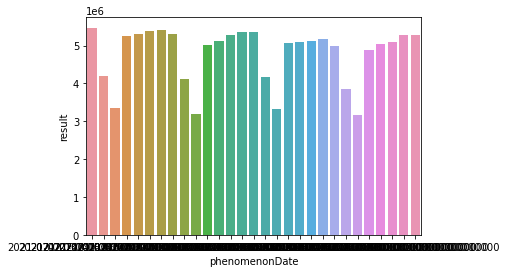

In [22]:
sns.barplot(x="phenomenonDate", y="result", data=SumCars_summer)


In [23]:
SumCars_summer.max()

phenomenonDate    2021-07-30 00:00:00
result                        5470977
dtype: object

In [24]:
SumCars_summer.min()

phenomenonDate    2021-07-02 00:00:00
result                        3168703
dtype: object

In [25]:
#Winter 
start_date_winter = '2020-12-01'
end_date_winter = '2021-01-04'

mask_winter = (df_clean_data['phenomenonDate'] > start_date_winter) & (df_clean_data['phenomenonDate'] <= end_date_winter)

df_clean_data_winter = df_clean_data.loc[mask_winter]

df_clean_data_winter

,@iot.id,phenomenonDate,result,id,lat,long,weekday
6,51839722,2021-01-01,2829,14812,53.628402,10.140319,Friday
9,51845703,2021-01-02,4340,14812,53.628402,10.140319,Saturday
11,51850923,2020-12-03,9121,14812,53.628402,10.140319,Thursday
12,51851403,2021-01-03,3388,14812,53.628402,10.140319,Sunday
13,51862133,2020-12-05,6386,14812,53.628402,10.140319,Saturday
...,...,...,...,...,...,...,...
120610,53683196,2020-12-27,1372,14412,53.530336,10.065717,Sunday
120611,53687056,2020-12-28,3393,14412,53.530336,10.065717,Monday
120612,53690537,2020-12-29,3370,14412,53.530336,10.065717,Tuesday
120613,53693612,2020-12-30,3500,14412,53.530336,10.065717,Wednesday


In [26]:
SumCars_winter = df_clean_data_winter.pivot_table(values = "result", index = "phenomenonDate", aggfunc = "sum")
SumCars_winter

,result
phenomenonDate,
2020-12-02,5521792
2020-12-03,5583759
2020-12-04,5625966
2020-12-05,3982856
2020-12-06,2702509
2020-12-07,5304718
2020-12-08,5626378
2020-12-09,5586877
2020-12-10,5673543


In [27]:
SumCars_winter.reset_index(level=0, inplace=True)

<AxesSubplot:xlabel='phenomenonDate', ylabel='result'>

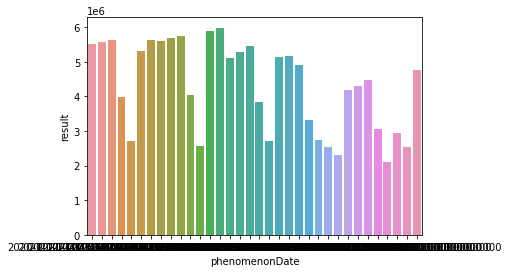

In [28]:
sns.barplot(x="phenomenonDate", y="result", data=SumCars_winter)

In [29]:
SumCars_winter.min()

phenomenonDate    2020-12-02 00:00:00
result                        2114569
dtype: object

In [30]:
SumCars_winter.loc[SumCars_winter["result"]==2114569]

,phenomenonDate,result
30,2021-01-01,2114569


In [31]:
##--> am 01.01.2021 am wenigsten Autos um Weihnachten rum

In [32]:
SumCars_winter.max()

phenomenonDate    2021-01-04 00:00:00
result                        5983060
dtype: object

In [33]:
SumCars_winter.loc[SumCars_winter["result"]==5983060]

,phenomenonDate,result
13,2020-12-15,5983060


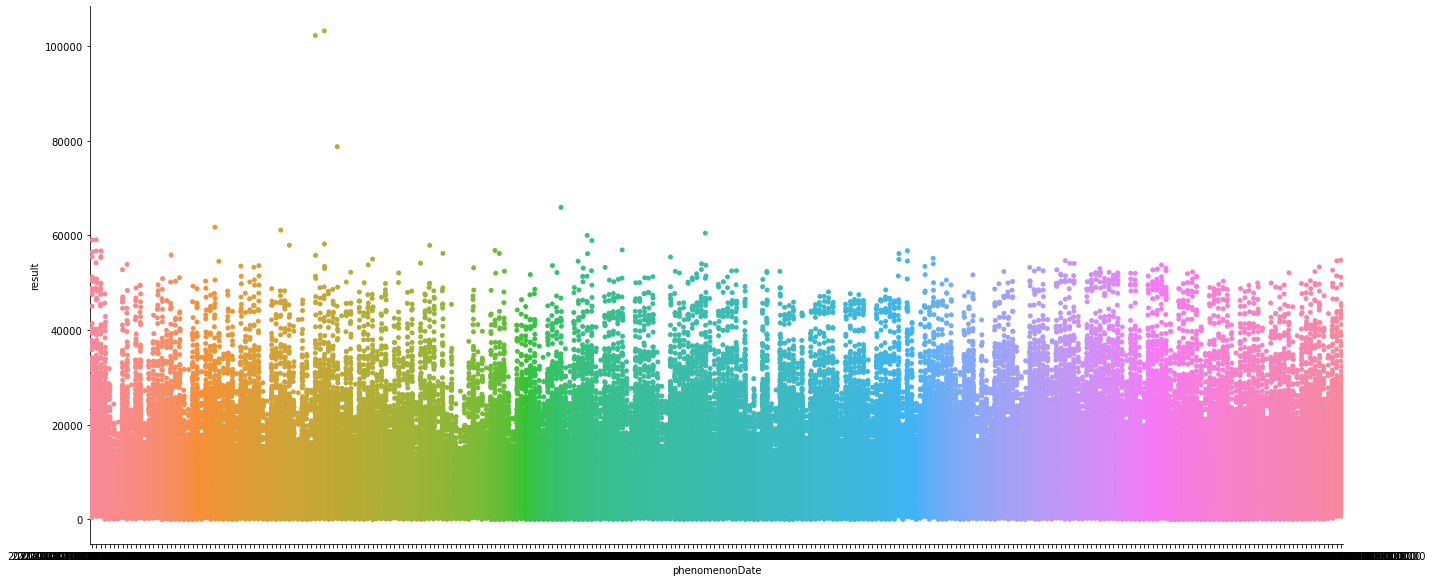

In [34]:
# How much traffic is there all combined every day?
sns.catplot(x="phenomenonDate", y="result", data = df_clean_data, height=8, aspect=2.5)

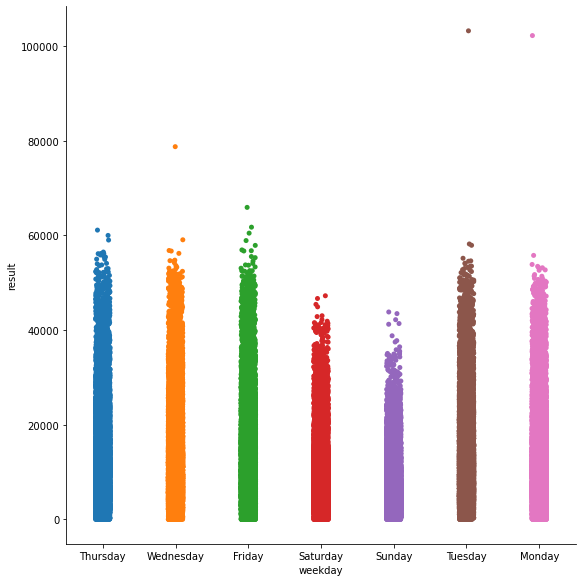

In [35]:
# Amount of cars per weekday
sns.catplot(x="weekday", y="result", data = df_clean_data, height=8)

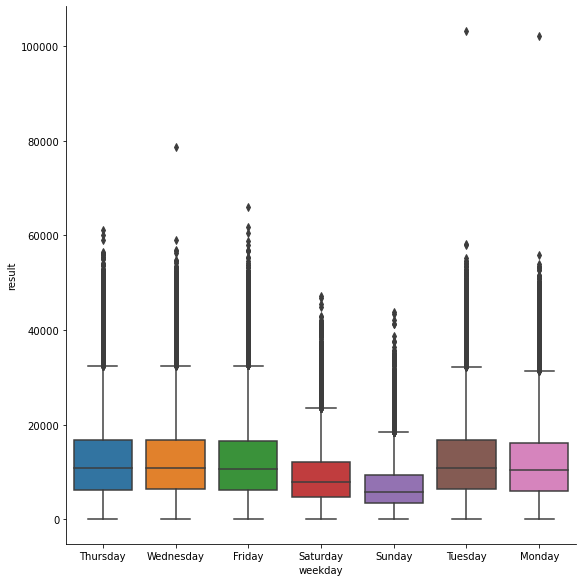

In [36]:
# Another way for visualiszation is using a boxplot. 
sns.catplot(x="weekday", y="result", kind="box", data=df_clean_data, height = 8)

In [37]:
# Calculating the average of each weekday
df_clean_data_mean=df_clean_data.groupby(['weekday']).mean()



In [38]:
df_clean_data_mean

,@iot.id,result,id,lat,long
weekday,,,,,
Friday,9.287463e+07,12697.618640,13884.032185,53.573144,10.007551
Monday,9.011863e+07,12384.778197,13879.467904,53.573155,10.007550
Saturday,9.019648e+07,9303.280036,13879.508514,53.573118,10.007594
Sunday,8.964676e+07,7157.507058,13878.535231,53.573114,10.007555
Thursday,9.216136e+07,12794.976255,13884.373447,53.573153,10.007410
Tuesday,9.069728e+07,12896.377504,13879.874030,53.573114,10.007424
Wednesday,9.150572e+07,12950.962839,13883.800497,53.573168,10.007486


In [39]:
df_clean_data_mean.reset_index(level=0, inplace=True)

In [40]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]

<AxesSubplot:xlabel='weekday', ylabel='result'>

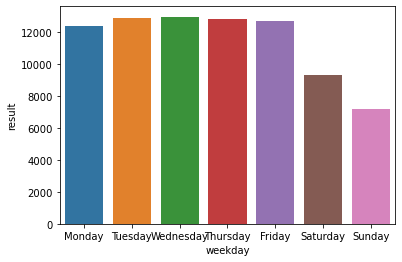

In [41]:
sns.barplot(x="weekday", y="result", data=df_clean_data_mean, order=order)

In [42]:
# Convert single digit weeknumbers to 2-digit weeknumbers (e.g "5" to "05")
# Weeknumbers

df_clean_data["Weeknumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[1])
df_clean_data["yearnumber"] = df_clean_data["phenomenonDate"].apply(lambda x: x.isocalendar()[0])

In [43]:
def convert_weekno(num_weeknumber):
    if len(str(num_weeknumber)) == 1:
        Weeknumber_clean = '0'+str(num_weeknumber)
    else:
        Weeknumber_clean = str(num_weeknumber)
    return(Weeknumber_clean)

df_clean_data["Weeknumberstring"] = df_clean_data["Weeknumber"].apply(lambda x: convert_weekno(x))

In [44]:
df_clean_data["yearnumber"]=df_clean_data["yearnumber"].astype(object)

In [45]:
# Combine year + weeknumber
df_clean_data["Week in year"] = df_clean_data["yearnumber"].map(str)+df_clean_data["Weeknumberstring"].map(str)

In [46]:
df_clean_data["Week in year"]

0         202132
1         202132
2         202132
3         202103
4         202103
           ...  
120804    202130
120805    202130
120806    202131
120807    202131
120808    202131
Name: Week in year, Length: 120476, dtype: object

In [47]:
df_clean_data.dtypes

@iot.id                      int64
phenomenonDate      datetime64[ns]
result                       int64
id                           int64
lat                        float64
long                       float64
weekday                     object
Weeknumber                   int64
yearnumber                  object
Weeknumberstring            object
Week in year                object
dtype: object

In [48]:
df_clean_data["Week in year"]=df_clean_data["Week in year"].astype(int)

In [49]:
#Calculating the average of each week:
df_clean_data_weekmean=df_clean_data.groupby(['Week in year']).mean()


In [53]:
df_clean_data_weekmean.reset_index(level=0, inplace=True)

In [52]:
columns = ['Week in year','result']

df_clean_data_weekmean=df_clean_data_weekmean[columns]

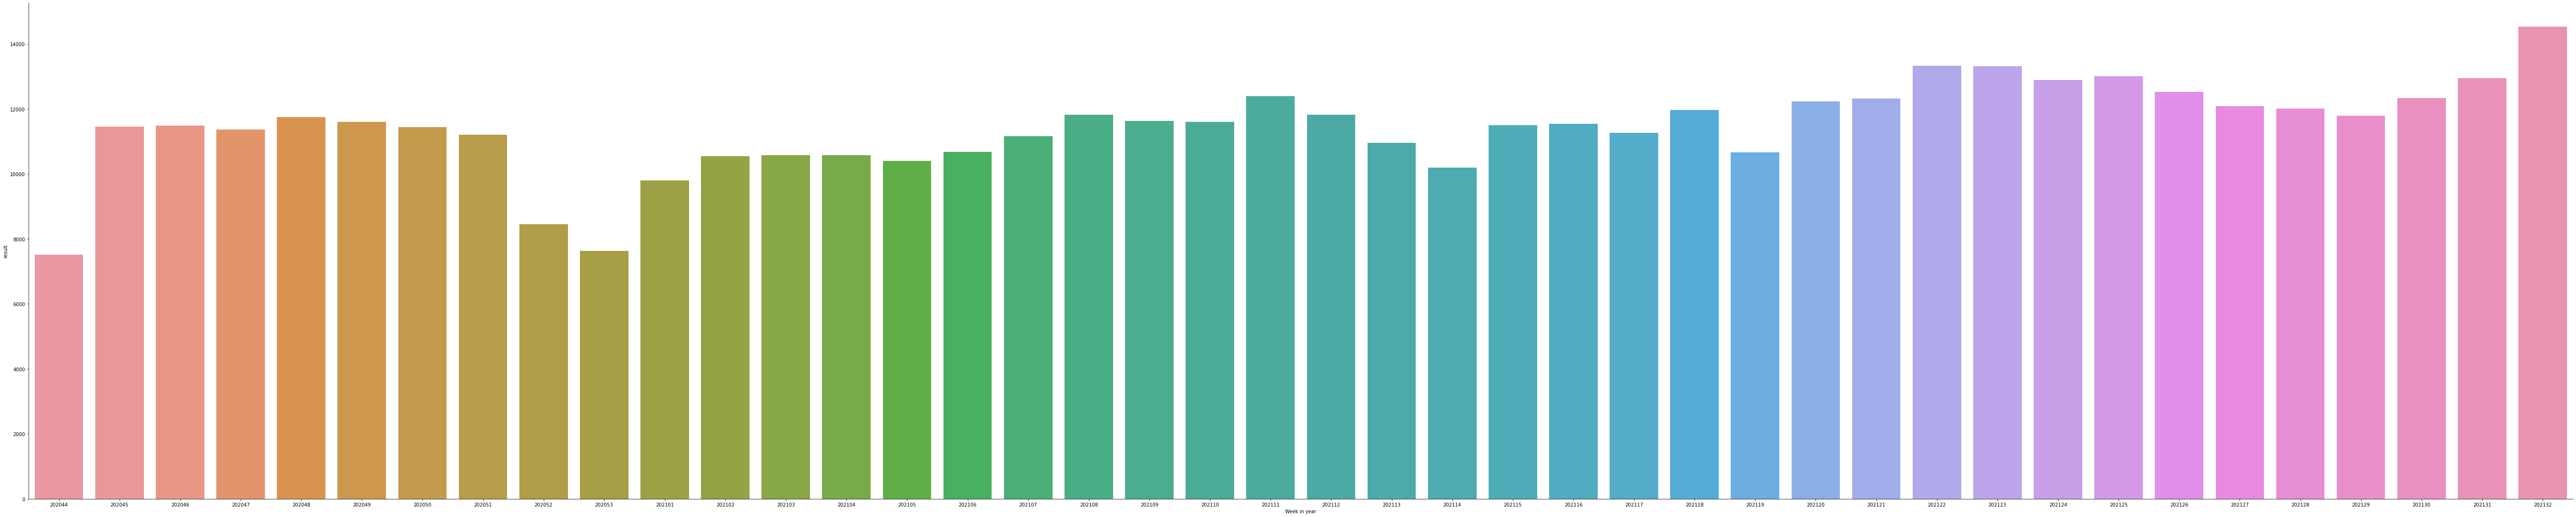

In [54]:
sns.catplot(x="Week in year", y="result", data=df_clean_data_weekmean, height=15, aspect=5, kind = "bar")

In [55]:
##---> rising trend (due to fewer Corona restrictions?)

In [56]:
df_clean_data_weekmean.nsmallest(10, 'result')

,index,Week in year,result
0,0,202044,7514.288136
9,9,202053,7629.139024
8,8,202052,8456.426118
10,10,202101,9796.058974
23,23,202114,10194.017561
14,14,202105,10401.597000
11,11,202102,10552.567525
12,12,202103,10574.097311
13,13,202104,10575.038107
28,28,202119,10671.815966


In [ ]:
#Explanation lowest traffic weeks
# 2020-44 - (26.10.-1.11.)All saint´s day, Halloween
# 2020-53 - Christmas
# 2020-52 - Christmas
# 2021-01 - New year
# 2021-14 - (05.04. - 11.04.) Easter week
#....

In [57]:
#save in csv format
df_clean_data_weekmean.to_csv(r'C:\Users\Maren\Desktop\TechLabs\hh_techlabs_group12\hh_techlabs_group12\carmean.csv',index=False)